## Installing Deep Graph Library (DGL)

In [1]:
!pip install dgl

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
!pip install torch==1.5.0+cpu torchvision==0.6.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Attempting uninstall: torch
    Found existing installation: torch 1.2.0+cpu
    Uninstalling torch-1.2.0+cpu:
      Successfully uninstalled torch-1.2.0+cpu
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.4.0+cpu
    Uninstalling torchvision-0.4.0+cpu:
      Successfully uninstalled torchvision-0.4.0+cpu


In [2]:
import numpy as np
import dgl

In [3]:
def build_karate_club_graph():
    src = np.array([1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 9, 10, 10,
        10, 11, 12, 12, 13, 13, 13, 13, 16, 16, 17, 17, 19, 19, 21, 21,
        25, 25, 27, 27, 27, 28, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33,
        33, 33, 33, 33, 33, 33, 33, 33, 33, 33])
    dst = np.array([0, 0, 1, 0, 1, 2, 0, 0, 0, 4, 5, 0, 1, 2, 3, 0, 2, 2, 0, 4,
        5, 0, 0, 3, 0, 1, 2, 3, 5, 6, 0, 1, 0, 1, 0, 1, 23, 24, 2, 23,
        24, 2, 23, 26, 1, 8, 0, 24, 25, 28, 2, 8, 14, 15, 18, 20, 22, 23,
        29, 30, 31, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30,
        31, 32])
    u = np.concatenate([src,dst])
    v = np.concatenate([dst,src])
    
    return dgl.DGLGraph((u,v))

In [4]:
G = build_karate_club_graph()
print(G.number_of_nodes())
print(G.number_of_edges())

34
156


In [5]:
G

DGLGraph(num_nodes=34, num_edges=156,
         ndata_schemes={}
         edata_schemes={})

In [6]:
!pip install networkx

In [7]:
import networkx as nx

In [8]:
nx_G = G.to_networkx().to_undirected() #Converting G to networkx graph to visualise 

In [9]:
nx_G

In [22]:
#nx.draw?

In [10]:
pos = nx.kamada_kawai_layout(nx_G)

In [11]:
pos #Positions of nodes -> Dictionary

{0: array([0.02595265, 0.3326179 ]),
 1: array([-0.15415402,  0.25105994]),
 2: array([ 0.0728113 , -0.00339834]),
 3: array([0.15120783, 0.23250616]),
 4: array([0.19313544, 0.57445429]),
 5: array([0.18996363, 0.67901702]),
 6: array([-0.00442195,  0.69195753]),
 7: array([0.28351953, 0.21023574]),
 8: array([-0.17565775, -0.00990142]),
 9: array([ 0.0706129, -0.2892516]),
 10: array([0.37980827, 0.53262302]),
 11: array([-0.18776546,  0.6332519 ]),
 12: array([0.43374413, 0.37950471]),
 13: array([-0.08512009,  0.05268195]),
 14: array([-0.50006703, -0.31244432]),
 15: array([-0.46577852, -0.42902512]),
 16: array([0.15957837, 1.        ]),
 17: array([-0.27933097,  0.51420533]),
 18: array([-0.39589978, -0.53439664]),
 19: array([-0.2753847 ,  0.06921986]),
 20: array([-0.29337502, -0.61554258]),
 21: array([-0.37319087,  0.43635094]),
 22: array([-0.15864176, -0.64280202]),
 23: array([ 0.23606481, -0.51550091]),
 24: array([ 0.57008117, -0.29665387]),
 25: array([ 0.54879028, -0.

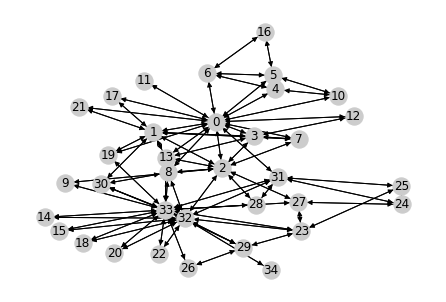

In [73]:
#Directed graph using networkx
nx.draw(nx_G,pos,with_labels=True,node_color=[[0.8,0.8,0.8]])

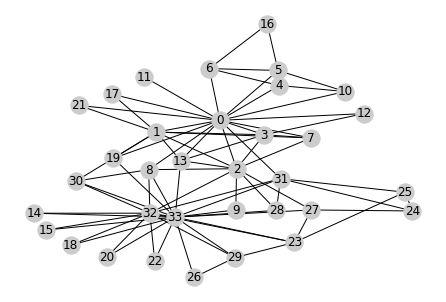

In [13]:
#Undirected graph using networkx
nx.draw(nx_G,pos,with_labels=True,node_color=[[0.8,0.8,0.8]])

## Assigning node features

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [15]:
embed = nn.Embedding(34,5)

In [16]:
G.ndata['feat'] = embed.weight

In [17]:
print(G.ndata['feat'][[2,7]])

tensor([[ 2.4651,  1.0917,  0.0958,  1.5924,  1.3049],
        [-0.4288, -0.3081,  1.6847,  1.5131,  0.9694]],
       grad_fn=<IndexBackward>)


In [18]:
embed.weight

Parameter containing:
tensor([[-7.7606e-01, -1.6658e+00,  4.8894e-01, -9.4314e-01,  5.2817e-01],
        [-1.3270e+00,  1.6799e+00,  5.3359e-01,  1.0787e+00,  7.3432e-01],
        [ 2.4651e+00,  1.0917e+00,  9.5786e-02,  1.5924e+00,  1.3049e+00],
        [ 1.9170e-01,  2.2671e+00,  1.7472e+00,  9.0866e-01, -4.4726e-01],
        [-1.1042e+00,  1.8280e+00, -1.2918e+00, -4.7047e-01,  7.9852e-01],
        [ 8.9679e-01, -9.2134e-01,  4.0444e-01,  6.0398e-01, -1.5728e+00],
        [-2.8141e-01,  2.8455e-01,  7.2866e-01, -1.6772e+00, -1.3838e+00],
        [-4.2884e-01, -3.0813e-01,  1.6847e+00,  1.5131e+00,  9.6935e-01],
        [ 1.5148e-01,  1.1229e+00, -1.7737e+00,  9.4257e-01, -2.3184e-01],
        [-1.7885e+00, -3.2205e-01, -1.7308e-01, -5.4731e-01,  4.7942e-01],
        [-7.6652e-01, -1.5886e+00,  1.4429e+00,  4.8277e-01,  8.8373e-01],
        [ 1.6244e-03, -2.8124e-01, -1.8185e-01, -7.6992e-01,  3.7995e-01],
        [-4.1325e-01,  1.1030e+00,  5.9341e-01,  1.0108e+00,  1.1939e+00],
   

In [32]:
#nn.Embedding?

## Define Graph Convolutional Network

In [19]:
from dgl.nn.pytorch import GraphConv

In [20]:
class GCN(nn.Module):
    def __init__(self,input_size,hidden_size1,hidden_size2,num_classes):
        super(GCN,self).__init__()
        self.conv1 = GraphConv(input_size,hidden_size1)
        self.conv2 = GraphConv(hidden_size1,hidden_size2)
        self.conv3 = GraphConv(hidden_size2,num_classes)
    
    def forward(self,G,inputs):
        h = self.conv1(G,inputs)
        h = torch.relu(h)  #ReLU Activation
        h = self.conv2(G,h)
        h = torch.relu(h)
        h = self.conv3(G,h)
        return h

In [21]:
#2 output classes to represent cluster of instructor(node 0) and 
#club president(node 34) of Karate Club
net = GCN(5,4,3,2) 

In [22]:
inputs = embed.weight
labelled_nodes = torch.tensor([0,33])
labels = torch.tensor([0,1])

## Training

In [23]:
net

GCN(
  (conv1): GraphConv(in=5, out=4, normalization=both, activation=None)
  (conv2): GraphConv(in=4, out=3, normalization=both, activation=None)
  (conv3): GraphConv(in=3, out=2, normalization=both, activation=None)
)

In [24]:
net(G,inputs).detach()

tensor([[-0.7390, -1.0278],
        [-0.5398, -0.7629],
        [-0.4727, -0.6781],
        [-0.5836, -0.8492],
        [-0.4896, -0.6744],
        [-0.5898, -0.8197],
        [-0.3764, -0.5257],
        [-0.4231, -0.5995],
        [-0.3052, -0.5026],
        [-0.2332, -0.3889],
        [-0.2431, -0.3350],
        [-0.2268, -0.3246],
        [-0.3058, -0.4201],
        [-0.4342, -0.6424],
        [-0.1316, -0.2774],
        [-0.1316, -0.2774],
        [-0.2589, -0.3388],
        [-0.3079, -0.4362],
        [-0.1316, -0.2774],
        [-0.3234, -0.4932],
        [-0.1316, -0.2774],
        [-0.3079, -0.4362],
        [-0.1316, -0.2774],
        [-0.2265, -0.4021],
        [-0.1447, -0.2163],
        [-0.2556, -0.3730],
        [-0.1816, -0.3150],
        [-0.3551, -0.5601],
        [-0.2264, -0.3614],
        [-0.2312, -0.3885],
        [-0.2301, -0.3851],
        [-0.3473, -0.5644],
        [-0.2879, -0.4293],
        [-0.3541, -0.5060]])

In [31]:
import itertools

optimizer = torch.optim.Adam(itertools.chain(net.parameters(), embed.parameters()), lr=0.01)
all_logits = []
for epoch in range(50):
    logits = net(G, inputs)
    all_logits.append(logits.detach())
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[labelled_nodes], labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch %d | Loss: %.4f' % (epoch, loss.item()))

Epoch 0 | Loss: 0.1802
Epoch 1 | Loss: 0.1740
Epoch 2 | Loss: 0.1681
Epoch 3 | Loss: 0.1621
Epoch 4 | Loss: 0.1567
Epoch 5 | Loss: 0.1521
Epoch 6 | Loss: 0.1476
Epoch 7 | Loss: 0.1432
Epoch 8 | Loss: 0.1389
Epoch 9 | Loss: 0.1347
Epoch 10 | Loss: 0.1311
Epoch 11 | Loss: 0.1276
Epoch 12 | Loss: 0.1241
Epoch 13 | Loss: 0.1207
Epoch 14 | Loss: 0.1177
Epoch 15 | Loss: 0.1152
Epoch 16 | Loss: 0.1127
Epoch 17 | Loss: 0.1103
Epoch 18 | Loss: 0.1081
Epoch 19 | Loss: 0.1059
Epoch 20 | Loss: 0.1039
Epoch 21 | Loss: 0.1020
Epoch 22 | Loss: 0.1001
Epoch 23 | Loss: 0.0984
Epoch 24 | Loss: 0.0967
Epoch 25 | Loss: 0.0950
Epoch 26 | Loss: 0.0934
Epoch 27 | Loss: 0.0919
Epoch 28 | Loss: 0.0904
Epoch 29 | Loss: 0.0889
Epoch 30 | Loss: 0.0874
Epoch 31 | Loss: 0.0862
Epoch 32 | Loss: 0.0846
Epoch 33 | Loss: 0.0833
Epoch 34 | Loss: 0.0820
Epoch 35 | Loss: 0.0807
Epoch 36 | Loss: 0.0794
Epoch 37 | Loss: 0.0782
Epoch 38 | Loss: 0.0770
Epoch 39 | Loss: 0.0758
Epoch 40 | Loss: 0.0747
Epoch 41 | Loss: 0.0735
Ep

In [32]:
logp[labelled_nodes]

tensor([[-7.4980e-05, -9.4986e+00],
        [-2.1007e+00, -1.3052e-01]], grad_fn=<IndexBackward>)

In [33]:
pos

{0: array([0.02595265, 0.3326179 ]),
 1: array([-0.15415402,  0.25105994]),
 2: array([ 0.0728113 , -0.00339834]),
 3: array([0.15120783, 0.23250616]),
 4: array([0.19313544, 0.57445429]),
 5: array([0.18996363, 0.67901702]),
 6: array([-0.00442195,  0.69195753]),
 7: array([0.28351953, 0.21023574]),
 8: array([-0.17565775, -0.00990142]),
 9: array([ 0.0706129, -0.2892516]),
 10: array([0.37980827, 0.53262302]),
 11: array([-0.18776546,  0.6332519 ]),
 12: array([0.43374413, 0.37950471]),
 13: array([-0.08512009,  0.05268195]),
 14: array([-0.50006703, -0.31244432]),
 15: array([-0.46577852, -0.42902512]),
 16: array([0.15957837, 1.        ]),
 17: array([-0.27933097,  0.51420533]),
 18: array([-0.39589978, -0.53439664]),
 19: array([-0.2753847 ,  0.06921986]),
 20: array([-0.29337502, -0.61554258]),
 21: array([-0.37319087,  0.43635094]),
 22: array([-0.15864176, -0.64280202]),
 23: array([ 0.23606481, -0.51550091]),
 24: array([ 0.57008117, -0.29665387]),
 25: array([ 0.54879028, -0.

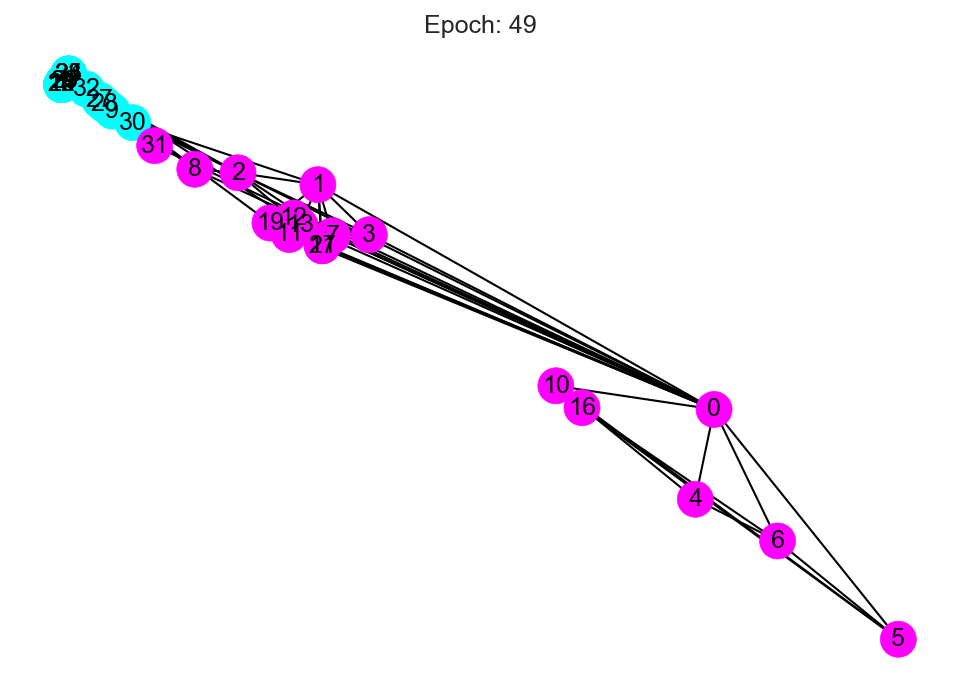

In [34]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def draw(i):
    cls1color = '#00FFFF'
    cls2color = '#FF00FF'
    pos = {}
    colors = []
    for v in range(34):
        pos[v] = all_logits[i][v].numpy()  # i = no. of epoch, v = no. of node
        cls = pos[v].argmax()
        colors.append(cls1color if cls else cls2color)
    ax.cla()
    ax.axis('off')
    ax.set_title('Epoch: %d' % i)
    nx.draw_networkx(nx_G, pos, node_color=colors,with_labels=True, node_size=300, ax=ax)

fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(49)

## Creating Graph by progressively adding more nodes and edges

In [41]:
G = dgl.DGLGraph()
G.add_nodes(10)
for i in range(1,4):
    G.add_edge(i,0)
src = list(range(4,8))
dst = [0]*4
G.add_edges(src,dst)
src = torch.tensor([8,9])
dst = torch.tensor([0,0])
G.add_edges(src,dst)

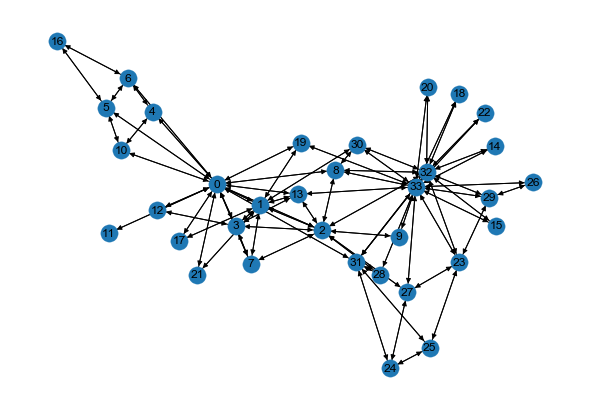

In [29]:
plt.style.use("seaborn")
nx.draw(G.to_networkx(), with_labels=True)
plt.show()